# SYDE 361: System Identification Assignment
### Spring 2023 

Student ID #: 20900617

### Instructions 
- Complete missing cells (i.e. where it says '\# Your answer here')
- Run all cells to make sure there are no errors 
- Save as html and submit both .html and .ipynb files to dropbox with filename: SYDE361-A1-student#

### Contents
0. Useful tools 
1. Obtaining position data
2. Solar Energy [12 marks]
3. Conversion Potential [10 marks]
4. Solar cell alignment [13 marks]
5. Bonus [3 marks bonus]

*Grading out of 35*

### Load the sun position function

In [2]:
%run sun.py

# 0. Some useful tools 

### *Can delete this section for submission*

There are two basic structures that you will encounter: lists and arrays. Matrices are just multidimensional arrays.

In [3]:
# List 
a_list = [1,2,3,4]
a_list

[1, 2, 3, 4]

We can get the size of a list as follows: 

In [4]:
len(a_list)

4

You only need a print() statement if it's in the middle of your cell, if its at the end you can just call the variable name. 

In [5]:
# create array from list
array = np.array(a_list)


print(array)

# generate empty 3x3 array
array2 = np.zeros([3,3])

array2

[1 2 3 4]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

We can get the size of an array like so:

In [6]:
array.shape

(4,)

We can use NumPy's linspace() or arange() to create an array of numbers depending if we care more about the length of the array or the spacing between its elements

In [7]:
# args; start, stop, (# elements)
np.linspace(1,10,20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [8]:
# args: start, stop, (spacing)
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

We might want to repeat values in an array. Depending on what you need you can use np.repeat() or np.tile().

In [9]:
#repeat each element twice
print(np.repeat(array,2))

#repeat the whole array twice
print(np.tile(array,2))

[1 1 2 2 3 3 4 4]
[1 2 3 4 1 2 3 4]


### List Comprehension
One convenient feature of Python is the ability to use list comprehensions in place of for loops 

In [10]:
# this is a loop
a_list = []
for x in array: 
    a_list.append(x)
print(a_list)

[1, 2, 3, 4]


In [11]:
# This is a list comprehension
a_list_comp = [x for x in array]

# Check if a_list is the same as a_list_comp
a_list == a_list_comp

True

**enumerate()** can give you the position *and* value of list or array element

In [12]:
for i,x in enumerate(array):
    print(i,x)

0 1
1 2
2 3
3 4


**zip()** can be useful to combine multiple lists/arrays in a loop structure or list comprehension

In [13]:
alphabet = np.array(['a','b','c','d'])

for x,y in zip(alphabet,array):
    print(x, y)
    

print('\nWith enumerate...\n')

for i,(x,y) in enumerate(zip(alphabet,array)):
    print(i, x, y)

a 1
b 2
c 3
d 4

With enumerate...

0 a 1
1 b 2
2 c 3
3 d 4


# 1. Obtaining position data
By default, the **sunPosition()** function will return values for: \
Latitude = 43.5 and Longitude = -80.5 \
These are the coordinates for Waterloo, ON

### 1.1 Hourly increments

In [14]:
#only hours
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
year = 2023
month = 5
day = 20
pos = np.array([sunPosition(2023,6,10,hr) for hr in hrs])
pos.shape

(24, 2)

This is an array of 24 values (each hour of day) with azimuth and elevation at each time-point.

**Elevation**: Angle of elevation of sun from horizon (degrees).

**Azimuth**: Compass orientation of sun, where North is 0 degrees. 



### Plotting Elevation and Azimuth separately

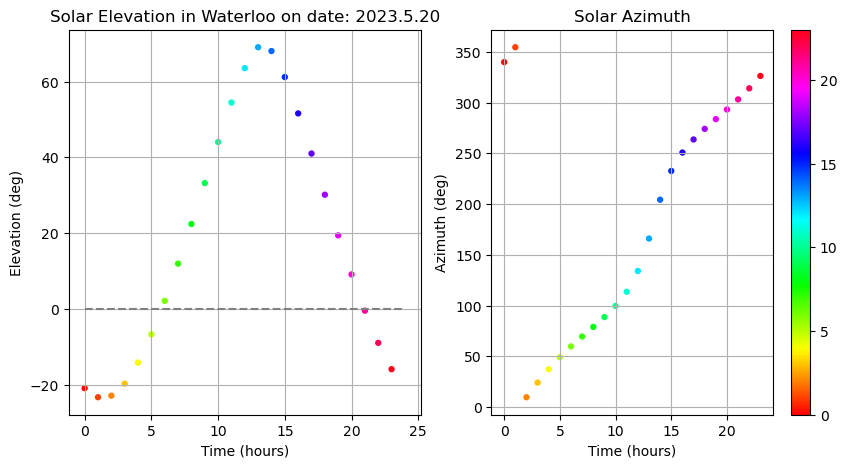

In [15]:
# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)

time = np.arange(0,24)

plt.scatter(time,pos[:,1], marker= '.',linestyle='-',s = 50,c = time,cmap=cm.hsv)
plt.grid()
# plot horizon
plt.hlines(y=0,xmin=0,xmax=24,linestyle='--',color='gray')
plt.xlabel('Time (hours)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Elevation in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))

plt.subplot(1,2,2)
plt.grid()
plt.scatter(time,pos[:,0], marker= '.',s = 50,c = time,cmap=cm.hsv)
plt.xlabel('Time (hours)')
plt.ylabel('Azimuth (deg)')
plt.title('Solar Azimuth')
plt.colorbar()
plt.show()

### Plotting Elevation against Azimuth 

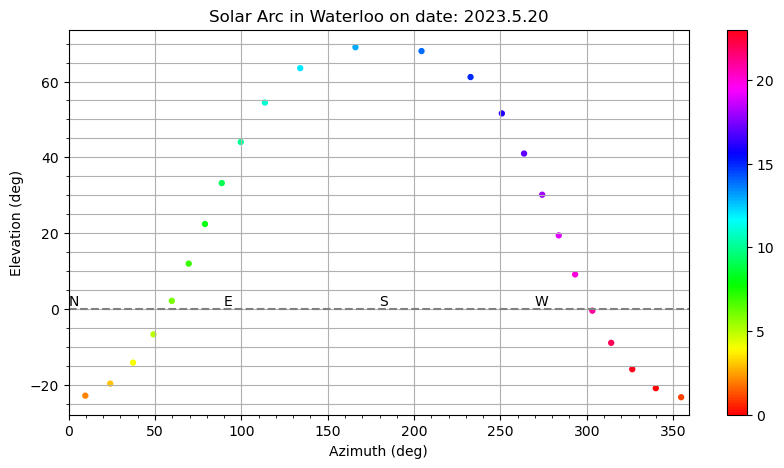

In [16]:
# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])

plt.scatter(pos[:,0],pos[:,1], marker= '.',s = 50,c = time,cmap=cm.hsv)
plt.text(0,1,"N")
plt.text(90,1,"E")
plt.text(180,1,"S")
plt.text(270,1,"W")
plt.xlim(0,359)
#plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
plt.colorbar()
plt.show()

### 1.2 In Minute Increments 

In [17]:
mins = np.arange(0,60)
#hours and mins 
pos = np.array([sunPosition(2023,6,10,hr,mn) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

### Plotting

Time of day is shown by marker color here. We will create a time variable that follows the form used in the list comprehension above:

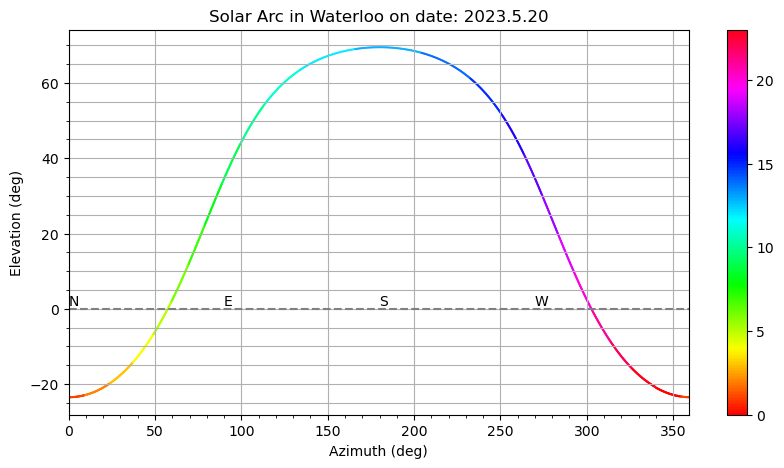

In [18]:
# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
# hours only
time = np.repeat(np.arange(0,24),60) 

plt.figure(figsize=[10,5])
plt.scatter((pos[:,0]),pos[:,1], marker= '.',s = 1,c = time,cmap=cm.hsv)
plt.text(0,1,"N")
plt.text(90,1,"E")
plt.text(180,1,"S")
plt.text(270,1,"W")
plt.xlim(0,359)
# plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
# add legend if you include the label argument in the plot function
#plt.legend()
plt.colorbar()
plt.show()

### 1.3 Another Geographic Location

In [19]:
lat = -33
long = -70

time_zone =4 # GMT -4
hrs = np.arange(0+time_zone,24+time_zone)
#hrs = np.arange(0,24)

#hours and mins 
pos = np.array([sunPosition(2023,6,10,hr,mn,lat=lat,long=long) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

### Plotting

Can use vertical lines (**vlines**) to indicate important times along with the color (**c**) of the points

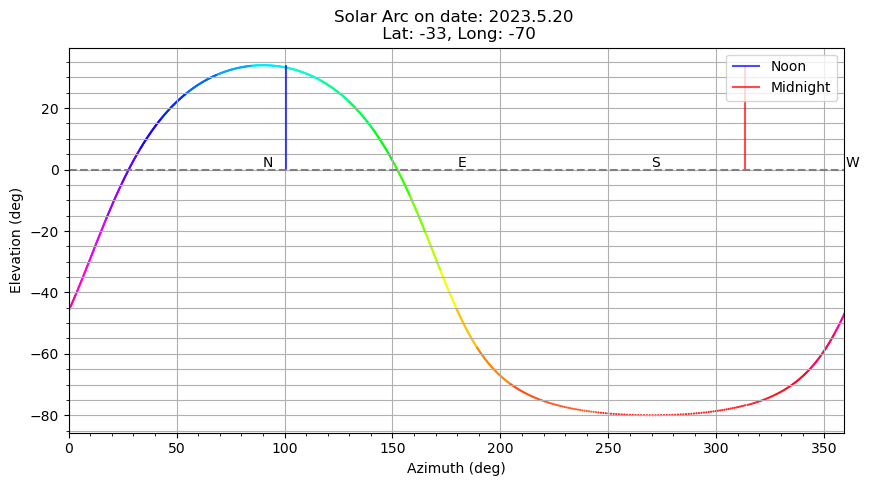

In [20]:
shift = 90 # shifting all x values for clarity of plot
plt.figure(figsize=[10,5])
plt.scatter((pos[:,0]+shift)%360,pos[:,1], marker= '.',s = 1,c = time,cmap=cm.hsv)

# NOON: this is the middle value of the azimuth array, so we can acccess it as follows
plt.vlines((pos[:,0][int(pos[:,0].shape[0]/2)]+shift)%360,
           ymin=0,ymax=max(pos[:,1]),color='blue',alpha=0.7,label='Noon')
# MIDNIGHT: this is the middle value of the azimuth array, so we can acccess it as follows
plt.vlines((pos[:,0][0]+shift)%360,
           ymin=0,ymax=max(pos[:,1]),color='red',alpha = 0.7,label='Midnight')
plt.text(0+shift,1,"N")
plt.text(90+shift,1,"E")
plt.text(180+shift,1,"S")
plt.text(270+shift,1,"W")
plt.xlim(0,359)

# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
#plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc on date: ' + str(year) +  '.' +  str(month) +
              '.' + str(day) + ' \n Lat: ' + str(lat) + ', Long: ' + str(long))
plt.legend()
plt.show()

### 1.3 Multiple Dates

Now we will show only daylight hours by setting the y-axis limits

In [21]:
months = [7,8,9,10,11,12]
#multiple days 
pos = [np.array([sunPosition(2023,month,1,hr,mn) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))]) 
                for month in months]
print(str(len(pos)) + ' Months')
pos[0].shape

6 Months


(1440, 2)

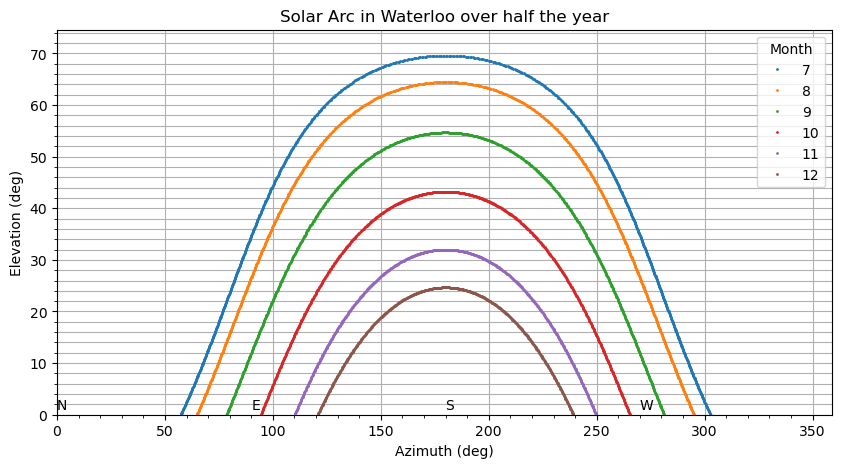

In [22]:
shift = 0
plt.figure(figsize=[10,5])
for i in range(0,len(months)):
    plt.plot((pos[i][:,0]+shift)%360,pos[i][:,1], '.',markersize=2,label=months[i])
plt.text(0+shift,1,"N")
plt.text(90+shift,1,"E")
plt.text(180+shift,1,"S")
plt.text(270+shift,1,"W")
plt.xlim(0,359)
plt.ylim(0,np.max(np.array(pos)[:,:,1])+5) # remove values below zero (only sunrise to sunset)
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo over half the year')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
# Adding legend, which shows "label" argument of plot
plt.legend(title='Month')
plt.show()

# 2. Solar energy

The amount of solar energy incident on a surface perpendicular to the sun is composed of two components, direct and diffuse light. Direct irradiation on a clear day, $I_d$, is given by the following empirical model [2]: 

$ I_d = 1,353 \cdot 0.7^{AM^{0.678}} $ [Watt/$m^2$]

And Air Mass, $AM$, which is the length of atmostphere the light must pass through, is related to the elevation angle, $\theta$ of the sun. It can be approximated as: 

$ AM = \frac{1}{\cos(90 - \theta)}$

### Effect of weather conditions 

The diffuse component of irraiance can be estimated as 10% of the direct component on a clear day, so that total available energy is: 

$ I_t = I_d + I_{diffuse} \\ \quad \approx 1.1 \cdot I_d $

This represents the theoretical maximum yield. We will work with this value but bear in mind cloud cover will reduce the total irradiance (though the diffuse contribution will be greater). 

### 2.1 [2 marks] Implement a function to estimate total irradiance (clear conditions) from elevation angle.

In [23]:
# Your answer here

def I_t(el):
    # insert functionality here
    el = max(el,0)
    AM = 1/np.cos(np.pi/2-np.deg2rad(el))
    I = 1.1 * 1353 * np.power(0.7, np.power(AM, 0.678))
    return I

### 2.2 [3 marks]: 
### Generate a single plot showing $I_t$ on both June 1st and January 1st in Waterloo, ON. 

- Use time for x axis 
- Use a legend to label each line
- Use appropriate units. 

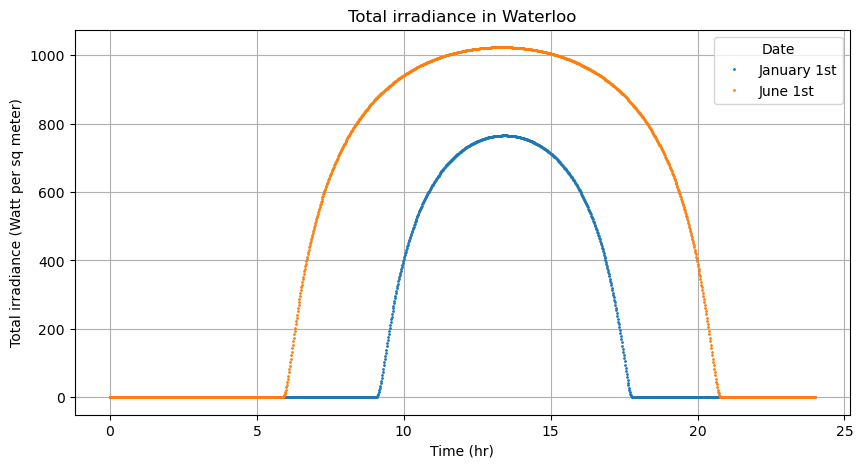

In [24]:
# Your answer here
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
pos0101 = np.array([sunPosition(2023,1,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
pos0601 = np.array([sunPosition(2023,6,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

It0101 = [I_t(el) for el in pos0101[:,1]]
It0601 = [I_t(el) for el in pos0601[:,1]]

# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60

plt.plot(time,It0101, '.',markersize=2,label='January 1st')
plt.plot(time,It0601, '.',markersize=2,label='June 1st')
plt.xlabel('Time (hr)')
plt.ylabel('Total irradiance (Watt per sq meter)')
plt.title('Total irradiance in Waterloo')
plt.legend(title='Date')
plt.grid()
plt.show()

### 2.3 [5 marks]: 
### Generate a single plot showing $I_t$ on both June 1st and January 1st in Yellowknife, NWT. 

- Use time for x axis 
- Use a legend to label each line
- Use appropriate units. 

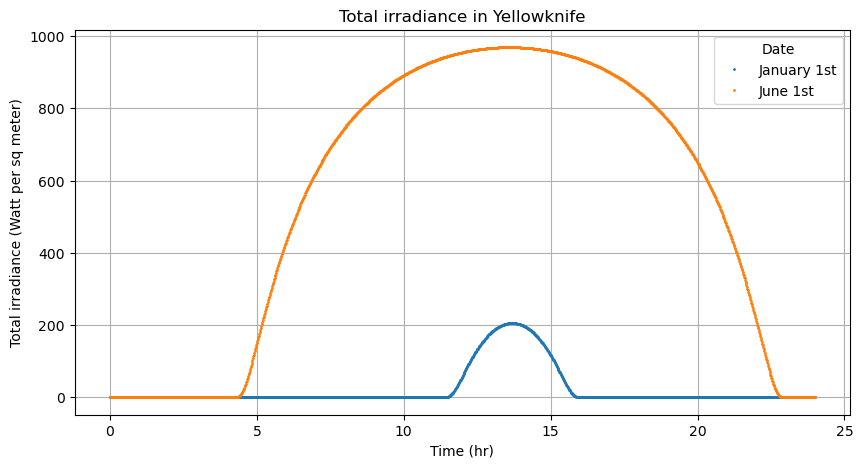

In [25]:
# Your answer here
time_zone = 6
lat = 62.453972
long = -114.371788
hrs = np.arange(0+time_zone,24+time_zone)
pos0101_yellowknife = np.array([sunPosition(2023,1,1,hr,mn,lat=lat,long=long) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
pos0601_yellowknife = np.array([sunPosition(2023,6,1,hr,mn,lat=lat,long=long) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

It0101_yellowknife = [I_t(el) for el in pos0101_yellowknife[:,1]]
It0601_yellowknife = [I_t(el) for el in pos0601_yellowknife[:,1]]

# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60

plt.plot(time,It0101_yellowknife, '.',markersize=2,label='January 1st')
plt.plot(time,It0601_yellowknife, '.',markersize=2,label='June 1st')
plt.xlabel('Time (hr)')
plt.ylabel('Total irradiance (Watt per sq meter)')
plt.title('Total irradiance in Yellowknife')
plt.legend(title='Date')
plt.grid()
plt.show()

## 2.4 [2 Marks]: Implement a function to calculate daily total energy on a unit ($m^2$) surface. 
### Use it to fill in the table below comparing Waterloo and Yellowknife.

In [26]:
# Your answer here
def I_day(el):  #el is a list of elevation every minute
    # insert functionality here
    It_list = [I_t(el_1) for el_1 in el]
    I_watt_min = np.trapz(It_list)
    I_day = I_watt_min / 60
    return I_day

# Waterloo
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
pos0101_waterloo = np.array([sunPosition(2023,1,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
pos0601_waterloo = np.array([sunPosition(2023,6,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
I_day_0101_waterloo = I_day(pos0101_waterloo[:,1])
I_day_0601_waterloo = I_day(pos0601_waterloo[:,1])

time_zone = 6
hrs = np.arange(0+time_zone,24+time_zone)
lat = 62.453972
long = -114.371788
pos0101_yellowknife = np.array([sunPosition(2023,1,1,hr,mn,lat=lat,long=long) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
pos0601_yellowknife = np.array([sunPosition(2023,6,1,hr,mn,lat=lat,long=long) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
I_day_0101_yellowknife = I_day(pos0101_yellowknife[:,1])
I_day_0601_yellowknife = I_day(pos0601_yellowknife[:,1])

print('Daily Irradiation (Watt-hour per m^2)')
pd.DataFrame(columns=['Waterloo','Yellowknife'],
             index=['Jan','June'],
             data=[[I_day_0101_waterloo,I_day_0101_yellowknife],[I_day_0601_waterloo,I_day_0601_yellowknife]])

Daily Irradiation (Watt-hour per m^2)


,Waterloo,Yellowknife
Jan,4941.525873,552.813044
June,11970.859384,13226.294169


# 3. Conversion Potential 

We can estimate current solar cell efficiency, $E_{PV}$ to be about 20% of the energy incident on the collector. 

$ E_{PV} \approx 0.2 \cdot I_t $ [W/$m^2$]

Considering this efficiency factor: 

## 3.1 [3 Marks]: 
## Implement a function that estimates current output for a solar panel of area $A$ in $cm^2$.
- Use elevation angle and panel area (A) as inputs
- Assume a working voltage of 5V
- Assume the angle of incidence between the light and surface normal is 0, i.e. perpendicular. 

In [27]:
# Your answer here

def current(el, area):
    #insert functionality
    E_pv = 0.2 * I_t(el)
    curr = E_pv * area / 10000 / 5
    return curr

## 3.2 [5 Marks]: Plot the theoretical current output in Waterloo on January 1st and Jun 1st
- Assume a panel size of 25 cm^2
- Plot time on the x-axis
- Include total daily current output (Amp-hours) in legend
- Use appropriate units and labels

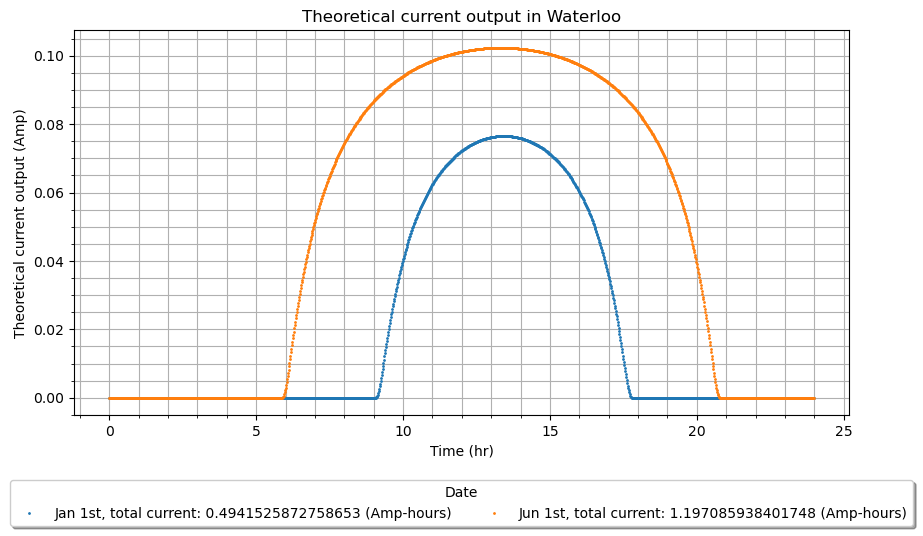

In [28]:
# Your answer here
def current_day(current_list):  #list of current every minute
    current_watt_min = np.trapz(current_list)
    current_day = current_watt_min / 60
    return current_day

time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
pos0101 = np.array([sunPosition(2023,1,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
pos0601 = np.array([sunPosition(2023,6,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

current0101 = [current(el, 25) for el in pos0101[:,1]]
current0601 = [current(el, 25) for el in pos0601[:,1]]

# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60


# Total daily current output
current0101_day = current_day(current0101)
current0601_day = current_day(current0601)

plt.plot(time,current0101, '.',markersize=2,label=f'Jan 1st, total current: {current0101_day} (Amp-hours)')
plt.plot(time,current0601, '.',markersize=2,label=f'Jun 1st, total current: {current0601_day} (Amp-hours)')
plt.xlabel('Time (hr)')
plt.minorticks_on()
plt.grid(which='both')
plt.ylabel('Theoretical current output (Amp)')
plt.title('Theoretical current output in Waterloo')
plt.legend(title='Date', loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show()

## 3.3 [2 Marks]
 Consider a use-case where clear-sky current output must be above 60 mA. Provide an accurate estimate of the length of time (in hours) this solar cell size would be useful for these two dates.

In [29]:
# Your answer here
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
mins = np.arange(0,60)
pos0101 = np.array([sunPosition(2023,1,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
pos0601 = np.array([sunPosition(2023,6,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

current0101 = [current(el, 25) for el in pos0101[:,1]]
current0601 = [current(el, 25) for el in pos0601[:,1]]

valid_current0101 = [curr > 60/1000 for curr in current0101]
valid_current0101_hour = sum(valid_current0101) / 60
valid_current0601 = [curr >= 60/1000 for curr in current0601]
valid_current0601_hour = sum(valid_current0601) / 60

print(f"Estimate of the length of time on Jan 1st: {valid_current0101_hour} hr")
print(f"Estimate of the length of time on Jun 1st: {valid_current0601_hour} hr")

Estimate of the length of time on Jan 1st: 5.166666666666667 hr
Estimate of the length of time on Jun 1st: 12.083333333333334 hr


# 4. Solar panel alignment

Up to now we have been calculating energy yields assuming no misalignment between the solar panel and light source. Now we will consider the effect of misalignment. 

## 4.1 Fixed configuration 

Consider a panel with a south-facing azimuth ($\gamma = 180$) fixed at an angle $\beta$ from the horizontal. Its normal vector will be oriented $90 - \beta$ degrees into the sky from the horizontal. 

The angle of incidence, $\theta$ between sunlight and the panel's normal vector is given by the following relation (eq. 5 as reviewed by NREL [3]): 

$ \cos(\theta) = \cos(\beta)\cos(\theta_z) + \sin(\beta)\sin(\theta_z)\cos(\gamma_s-\gamma) $

Where: 
- $\theta_z$: zenith angle of sun (= 90 - elevation) 
- $\gamma_s$: azimuth of sun

In the summer, fixed solar panels are recommended to have a tilt angle of the site's latitude minus 15 degrees. In the winter, it is latitude plus 15 degrees. This adjustment value comes from the Earth's axial tilt. At the exact solstaces, the ideal angle will be latitude +/- 23.5 (the exact axial tilt of the Earth).  

## [2 marks] Using this equation, show the optimal tilt angle $\beta$ for June 1st and January 1st by plotting a few angles around the theoretical optimal value

Hint for showing only daylight hours : 
- You can hide values of an array (here: x) based on some condition of another array (e.g. y) of the same length: 
- x[y > 0] will only include elements in x where the corresponding one in y is greater than zero. 

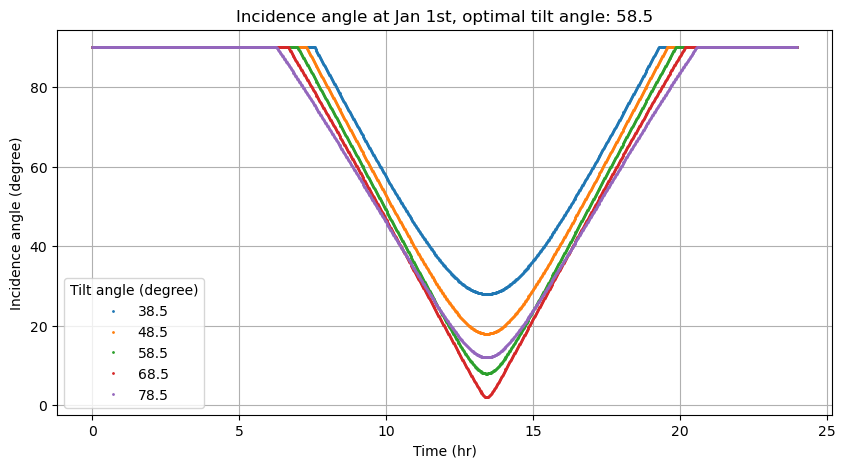

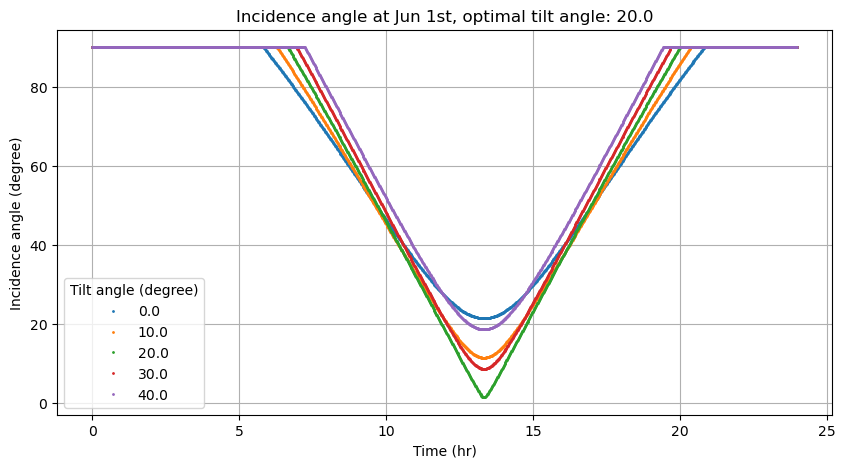

In [30]:
# Your answer here

# computes the incidence angle above 
# el and az can be arrays (as function of time)
def inc_ang(beta, panel_az, el, az):
    
    beta = np.radians(beta)
    panel_az = np.radians(panel_az)
    zen = np.radians(90 - el)
    azrad = np.radians(az)
    
    arg = np.cos(beta)*np.cos(zen)+ \
            np.sin(beta)*np.sin(zen)*np.cos(azrad-panel_az)
    deg = np.degrees(np.arccos(arg))
    
    # max value is 90, means output is zero 
    deg[deg>90] = 90
    
    return deg

# Jan 1st
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
beta0101_opt = 43.5 + 15
pos0101 = np.array([sunPosition(2023,1,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
beta0101_list = np.linspace(38.5, 78.5,5)
for beta in beta0101_list:
    inc_ang0101 = inc_ang(beta, 180, pos0101[:,1], pos0101[:,0])
    plt.plot(time, inc_ang0101, '.',markersize=2,label=beta)
plt.xlabel('Time (hr)')
plt.ylabel('Incidence angle (degree)')
plt.title(f'Incidence angle at Jan 1st, optimal tilt angle: {beta0101_opt}')
plt.legend(title='Tilt angle (degree)')
plt.grid()
plt.show()

# Jun 1st
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
beta0601_opt = 43.5 - 23.5
pos0601 = np.array([sunPosition(2023,6,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
beta0601_list = np.linspace(0, 40,5)
for beta in beta0601_list:
    inc_ang0601 = inc_ang(beta, 180, pos0601[:,1], pos0601[:,0])
    plt.plot(time, inc_ang0601, '.',markersize=2,label=beta)
plt.xlabel('Time (hr)')
plt.ylabel('Incidence angle (degree)')
plt.title(f'Incidence angle at Jun 1st, optimal tilt angle: {beta0601_opt}')
plt.legend(title='Tilt angle (degree)')
plt.grid()
plt.show()

## 4.2 Fixed panel output 

When the angle of incidence, $\theta$ is non-zero, the actual energy on the surface can be estimated as: 

$ E = E_{pv} \cdot \cos(\theta) $

## [3 marks] Use this relation to estimate the current output as a function of time for a fixed panel on June 1st (from *Section 3.2*)

- Use a tilt angle of 20 degrees
- Area of 25 cm^2
- Also include the ideal curve (angle of incidence always zero)

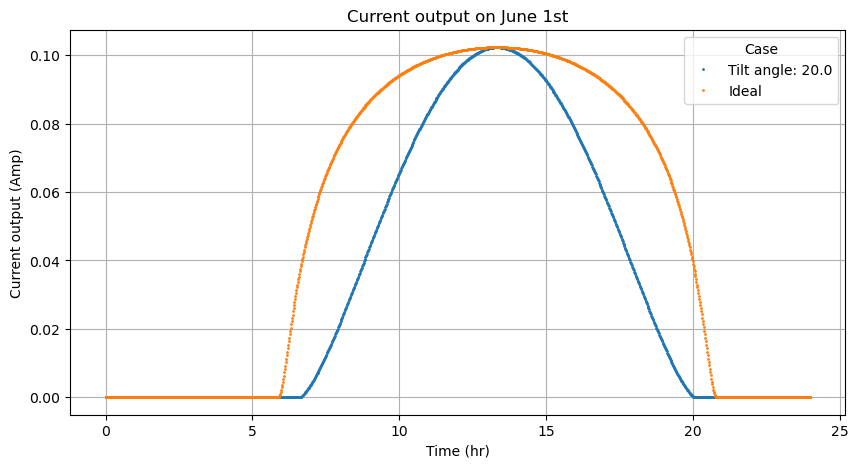

In [31]:
# Your solution here

def current_ang(el, area, angle=0):
    #insert functionality
    E_pv = 0.2 * I_t(el) * np.cos(np.deg2rad(angle))
    curr = E_pv * area / 10000 / 5
    return curr

# Jun 1st
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
beta0601_opt = 43.5 - 23.5
pos0601 = np.array([sunPosition(2023,6,1,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
inc_ang0601_opt = inc_ang(beta0601_opt, 180, pos0601[:,1], pos0601[:,0])
current0601_opt = [current_ang(pos, 25, inc_ang) for pos, inc_ang in zip(pos0601[:,1], inc_ang0601_opt)]
plt.plot(time, current0601_opt, '.',markersize=2,label=f'Tilt angle: {beta0601_opt}')

current0601_ideal = [current(pos, 25) for pos in pos0601[:,1]]
plt.plot(time, current0601_ideal, '.',markersize=2,label='Ideal')
plt.xlabel('Time (hr)')
plt.ylabel('Current output (Amp)')
plt.title(f'Current output on June 1st')
plt.legend(title='Case')
plt.grid()
plt.show()

## 4.3 Single-Axis tracking 

The incidence angle in the case of single-axis tracking is given in [3] and is similar to the fixed case. The same equation is used but now $\beta$ and $\gamma$ (the surface tilt and surface azimuth) are a function of rotation angle, $R$, axial tilt, $\beta_{axis}$, and the compass orientation of the tilt axis, $\gamma_{axis}$ and have to be calculated first.

- $\beta_{axis}$ = 90: vertical axis of rotation
- $\beta_{axis}$ = 0: horizontal axis of rotation
- Any value between 0 and 90 represents a tilted rotation axis

In the northern hemisphere, $\gamma_{axis}$ will be south, or 180 degrees, as in the fixed case. When $\beta_{axis}$ is 90 degrees (vertical axis of rotation), and $R$ is zero, the surface will face directly south (see Figure 1 in [3]). 

Equations (1) and (2) from NREL [3] are given below: 

$ \beta = \cos^{-1}[\cos R \cos \beta_{axis}] $

and 

$ \gamma = \gamma_{axis} + \sin^{-1}[\sin R \div \sin B] $

The rotation limits of R can be between -90 degrees and 90 degrees but will depend on physical limitations of the design. 

## [2 Marks] What would be the optimal value of $\beta_{axis}$ for a single-axis design? Would this be true for all use-cases?

Optimal value of beta_axis: 20.0
The optimal value of beta axis is not true for all use-cases, it changes as the location or the time zone changes,
and it is achieved when the incidence angle is minimized.
That's because the position of sun changes as the location and time zone changes.
In the summer, fixed solar panels are recommended to have a tilt angle of the site's latitude minus 15 degrees.
In the winter, it is latitude plus 15 degrees. This adjustment value comes from the Earth's axial tilt.
At the exact solstaces, the ideal angle will be latitude +/- 23.5 (the exact axial tilt of the Earth).


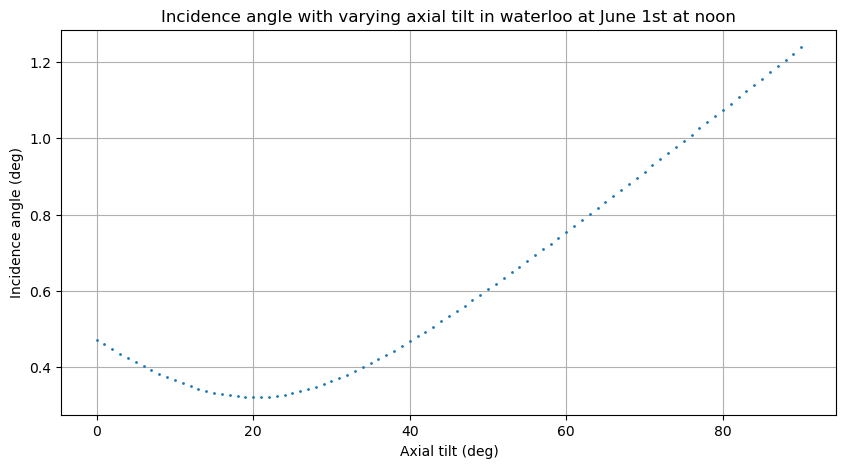

In [32]:
# Your answer here 
# Assume R = 0, and consider the case at noon when most power is available, and in waterloo at June 1st
time_zone = 4
R = 0
R = np.radians(R)
az_ax = 180
az_ax = np.radians(az_ax)
[az, el] = sunPosition(2023,6,1,12 + time_zone,0)
az = np.radians(az)
zen = np.radians(90 - el)

ang_inc_list = []
beta_ax_list = range(0,91)

ang_inc_opt = 90
for beta_ax in range(0,91):    
    beta_ax = np.radians(beta_ax)
    surface_beta = np.arccos(np.cos(R)*np.cos(beta_ax))
    temp = np.sin(surface_beta)
    if temp == 0:
        ratio = 0
    else:
        ratio = np.sin(R)/temp
    surface_az = az_ax + np.arcsin(ratio)
    ang_inc = np.arccos(np.cos(surface_beta)*np.cos(zen) + np.sin(surface_beta)*np.sin(zen)*np.cos(az - surface_az))
    ang_inc_list.append(ang_inc)
    if ang_inc < ang_inc_opt and ang_inc > 0:
        ang_inc_opt = ang_inc
        beta_ax_opt = np.degrees(beta_ax)
        
print(f"Optimal value of beta_axis: {beta_ax_opt}")
print("The optimal value of beta axis is not true for all use-cases, it changes as the location or the time zone changes,")
print("and it is achieved when the incidence angle is minimized.")
print("That's because the position of sun changes as the location and time zone changes.")
print("In the summer, fixed solar panels are recommended to have a tilt angle of the site's latitude minus 15 degrees.")
print("In the winter, it is latitude plus 15 degrees. This adjustment value comes from the Earth's axial tilt.")
print("At the exact solstaces, the ideal angle will be latitude +/- 23.5 (the exact axial tilt of the Earth).")

plt.figure(figsize=[10,5])
plt.plot(beta_ax_list, ang_inc_list, '.',markersize=2)
plt.xlabel('Axial tilt (deg)')
plt.ylabel('Incidence angle (deg)')
plt.title(f'Incidence angle with varying axial tilt in waterloo at June 1st at noon')
plt.grid()
plt.show()

The above two equations along with the angle of incidence and ideal value of R (given solar elevation, azimuth, and axis azimuth), are computed with the following provided functions. 

In [33]:
# Provided functions

#arguments in degrees
#beta_ax: beta of axis 
# az_ax: axis azimuth
# el: elevation of sun
# az: azimuth of sun
# limit: how far can the panel rotate in each direction? (default 90 i.e. can rotate 180 total)
def R_opt(beta_ax, az_ax, el, az,limit=90):
    beta_ax = np.radians(beta_ax)
    az_ax = np.radians(az_ax)
    
    zen = np.radians(90 - el)
    
    azrad = np.radians(az)
        
    arg = np.sin(zen)*np.sin(azrad-az_ax)/ \
            (np.sin(zen)*np.cos(azrad-az_ax)*np.sin(beta_ax) \
             + np.cos(zen)*np.cos(beta_ax))
    
    phi = np.where((arg < 0) & ((azrad-az_ax) > 0) , 180, 
            np.where((arg > 0) & ((azrad-az_ax) < 0), -180,0))
    
    
    R = np.degrees(np.arctan(arg)) + phi
    
    R[R>90] = limit
    R[R<-90] = -limit
    
    return R

def surface_beta(R, beta_ax):
    beta_ax = np.radians(beta_ax)
    Rrad = np.radians(R)
    beta = np.arccos(np.cos(Rrad)*np.cos(beta_ax))
    return np.degrees(beta)

# must calculate surface_beta first
def surface_azimuth(R, beta, az_ax):
    Rrad = np.radians(R)
    beta_rad = np.radians(beta)
    az_ax = np.radians(az_ax)
    
    surface_az = az_ax + np.arcsin(np.sin(Rrad)/np.sin(beta_rad))
    return np.degrees(surface_az)
    

def inc_SA(R, beta_ax, az_ax, el, az): 
    R = np.radians(R)
    beta_ax = np.radians(beta_ax)
    az_ax = np.radians(az_ax)
    el = np.radians(90-el)
    az = np.radians(az)
    
    arg = np.cos(R)*(np.sin(el)*np.cos(az-az_ax)*np.sin(beta_ax) \
                    +np.cos(el)*np.cos(beta_ax)) + \
                    np.sin(R)*np.sin(el)*np.sin(az-az_ax)
    return np.degrees(np.arccos(arg))

## [3 Marks] Plot the June 1st solar elevation versus azimuth as shown in *Section 1.1* along with the optimal single axis solar panel's orientation

- Use a beta_ax of 20, az_ax of 180
- Obtain the y component (elevation) of the solar panel as 90 - $\beta$ (computed from surface_beta())
- x component for solar panel will be its azimuth (computed from surface_azimuth())
- Plot only daylight hours (i.e. solar elevation > 0). 


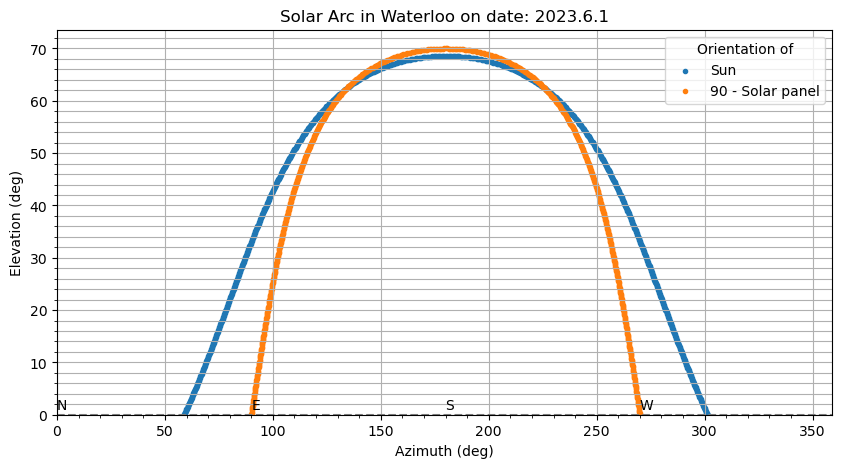

In [34]:
# Your answer here
beta_ax = 20
az_ax = 180

time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
mins = np.arange(0,60)
year = 2023
month = 6
day = 1
pos = np.array([sunPosition(year,month,day,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
az = pos[:,0]
el = pos[:,1]

#beta_ax: beta of axis 
# az_ax: axis azimuth
# el: elevation of sun
# az: azimuth of sun
# limit: how far can the panel rotate in each direction? (default 90 i.e. can rotate 180 total)
R = R_opt(beta_ax, az_ax, el, az,limit=90)
panel_beta = surface_beta(R, beta_ax)
panel_az = surface_azimuth(R, panel_beta, az_ax)

# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
# hours only
time = np.repeat(np.arange(0,24),60) 

plt.figure(figsize=[10,5])
plt.scatter(az,el, marker= '.', label="Sun")
plt.scatter(panel_az,90 - panel_beta, marker= '.', label="90 - Solar panel")
plt.text(0,1,"N")
plt.text(90,1,"E")
plt.text(180,1,"S")
plt.text(270,1,"W")
plt.xlim(0,359)
plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
# add legend if you include the label argument in the plot function
plt.legend(title="Orientation of")
plt.show()

## [3 Marks] Plot the percent loss in energy due to misalignment for fixed and single axis cases over time for June 1st
- During daylight hours

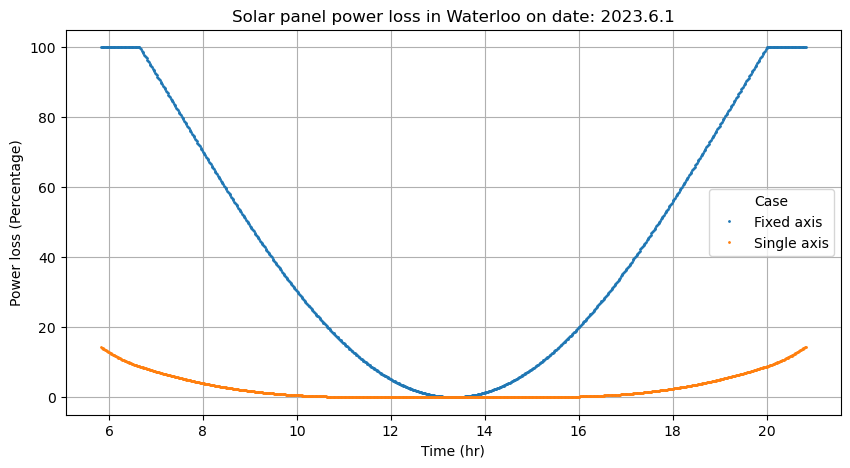

In [35]:
# Your answer here
beta_ax = 20
az_ax = 180
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
mins = np.arange(0,60)
year = 2023
month = 6
day = 1
pos = np.array([sunPosition(year,month,day,hr,mn) for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
az = pos[:,0]
el = pos[:,1]

# Jun 1st
plt.figure(figsize=[10,5])
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
beta0601_opt = 20

# Ideal current
current_ideal = [current(el_element, 25) for el_element in el]

# Daylight hour
pos_index = [i for i, val in enumerate(el) if val > 0]
start_index = pos_index[0]
end_index = pos_index[-1] + 1

# Fixed axis
inc_ang_fa = inc_ang(beta0601_opt, 180, el, az)
current_fa = [current_ang(el_element, 25, inc_ang) for el_element, inc_ang in zip(el, inc_ang_fa)]
power_loss_fa = []
for ideal, fa in zip(current_ideal, current_fa):
    if ideal == 0:
        power_loss_fa.append(0)
    else:
        power_loss_fa.append((ideal - fa) / ideal * 100)

# Single axis
R = R_opt(beta_ax, az_ax, el, az,limit=90)
inc_ang_sa = inc_SA(R, beta_ax, az_ax, el, az)
current_sa = [current_ang(el_element, 25, inc_ang) for el_element, inc_ang in zip(el, inc_ang_sa)]
power_loss_sa = []
for ideal, sa in zip(current_ideal, current_sa):
    if ideal == 0:
        power_loss_sa.append(0)
    else:
        power_loss_sa.append((ideal - sa) / ideal * 100)

plt.plot(time[start_index:end_index], power_loss_fa[start_index:end_index], '.',markersize=2,label=f'Fixed axis')
plt.plot(time[start_index:end_index], power_loss_sa[start_index:end_index], '.',markersize=2,label=f'Single axis')
plt.xlabel('Time (hr)')
plt.ylabel('Power loss (Percentage)')
plt.legend(title='Case')
plt.title('Solar panel power loss in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
plt.grid()
plt.show()

# BONUS

## [3 Marks bonus] Implement a function that finds the optimal period of rotational adjustment given panel size and motor power consumption.

How often, in minutes, will the panel rotate? 
- Use the June 1st solar data
- Assume a speed of rotation of 1 second per adjustment
- Use the panel size specified in *Section 3.2* and a motor power of 1.5 Watts
- Let the period of adjustment be constant over the day

In [36]:
daylight_start = start_index
start_h = int(daylight_start / 60)
start_min = int(daylight_start % 60)
print(start_index)
print(f"{start_h}:{start_min}")

daylight_end = end_index
end_h = int(daylight_end / 60)
end_min = int(daylight_end % 60)
print(end_index)
print(f"{end_h}:{end_min}")

350
5:50
1251
20:51


In [37]:
elapsed_t = 352
interval = 10
print(hrs[(elapsed_t - start_h*60):(elapsed_t - start_h*60+interval)])
print(mins[(elapsed_t - start_h*60):(elapsed_t - start_h*60+interval)])

[]
[52 53 54 55 56 57 58 59]


Optimal interval: 22
Max energy: 21109.009720035087


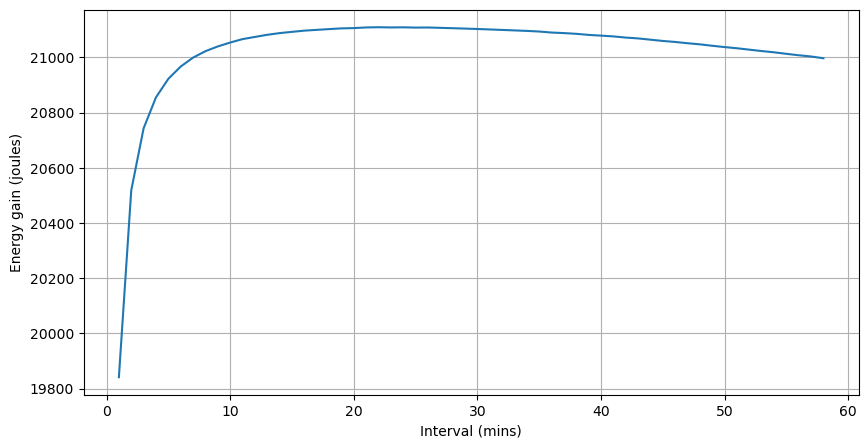

In [38]:
# Your answer here (bonus)
beta_ax = 20
az_ax = 180
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.repeat(np.arange(start_h+time_zone,end_h+1+time_zone),60)
mins = np.tile(np.arange(0,60),end_h+1-start_h)
year = 2023
month = 6
day = 1

p_consume = 1.5
voltage = 5
interval_list = range(1,59)
area = 25
opt_interval = 0
max_energy = 0
energy_list = []

for interval in interval_list:
    elapse_t = daylight_start
    energy = 0
    while elapse_t <= daylight_end:
        pos = np.array([sunPosition(year,month,day,hr,mn) for hr,mn in 
                        zip(hrs[(elapse_t - start_h*60):(elapse_t - start_h*60+interval)],mins[(elapse_t - start_h*60):(elapse_t - start_h*60+interval)])])
        # print(f"hrs: {hrs[(elapse_t - start_h*60):(elapse_t - start_h*60+interval)]}")
        # print(f"mins: {mins[(elapse_t - start_h*60):(elapse_t - start_h*60+interval)]}")
        az = pos[:,0]
        el = pos[:,1]
        R = R_opt(beta_ax, az_ax, el, az,limit=90)
        R = np.repeat(R[0],el.shape[0])
        # print(f"R: {R}")
        # print(f"interval: {interval} {R.shape} {el.shape} {az.shape}")
        inc_ang_sa = inc_SA(R, beta_ax, az_ax, el, az)
        # print("inc_ang_sa:")
        # print(inc_ang_sa)
        current_sa = [current_ang(el_element, area, inc_ang) for el_element, inc_ang in zip(el, inc_ang_sa)]
        # print(f"current_sa: {current_sa} {np.sum(current_sa)*voltage*60} energy: {energy}")
        energy += -1.5 + np.sum(current_sa) * voltage * 60
        elapse_t += interval
    energy_list.append(energy)

    if energy > max_energy:
        opt_interval = interval
        max_energy = energy
        
print(f"Optimal interval: {opt_interval}")
print(f"Max energy: {max_energy}")
        
plt.figure(figsize=[10,5])
plt.plot(interval_list, energy_list)
plt.xlabel('Interval (mins)')
plt.ylabel('Energy gain (joules)')
# plt.title('Solar panel power loss in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
plt.grid()
plt.show()

### References
[1] https://www.kaggle.com/code/benwatson/sun-position-function/script

[2] Meinel, Aden B., and Marjorie P. Meinel. "Applied solar energy: an introduction." Addison-Wesley Publishing Company, 1976.

[3] Marion, William F., and Aron P. Dobos, National Renewable Energy Laboratory. "Rotation angle for the optimum tracking of one-axis rrackers." Technical Report. July 2013. https://www.nrel.gov/docs/fy13osti/58891.pdf